**Importing necessary packages**


In [ ]:
#importing required packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

**Understanding the problem statement**

In [ ]:
#read the file
data = pd.read_csv("Tata Study Case Dataset.csv")
X = data[["High" , "Low", "Open","Last"]]
y = data["Close"]

In [ ]:
#print the head
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,08-10-18,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,05-10-18,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,04-10-18,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,03-10-18,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,01-10-18,234.55,234.60,221.05,230.30,230.90,1534749,3486.05


In [ ]:
#print the tail 
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,14-10-13,160.85,161.45,157.70,159.3,159.45,1281419,2039.09
1231,11-10-13,161.15,163.45,159.00,159.8,160.05,1880046,3030.76
1232,10-10-13,156.00,160.80,155.85,160.3,160.15,3124853,4978.80
1233,09-10-13,155.70,158.20,154.15,155.3,155.55,2049580,3204.49
1234,08-10-13,157.00,157.80,155.20,155.8,155.80,1720413,2688.94


**Close value**

In [ ]:
data_close=data.reset_index()['Close']
print(data_close)

0       215.15
1       209.20
2       218.20
3       227.60
4       230.90
         ...  
1230    159.45
1231    160.05
1232    160.15
1233    155.55
1234    155.80
Name: Close, Length: 1235, dtype: float64


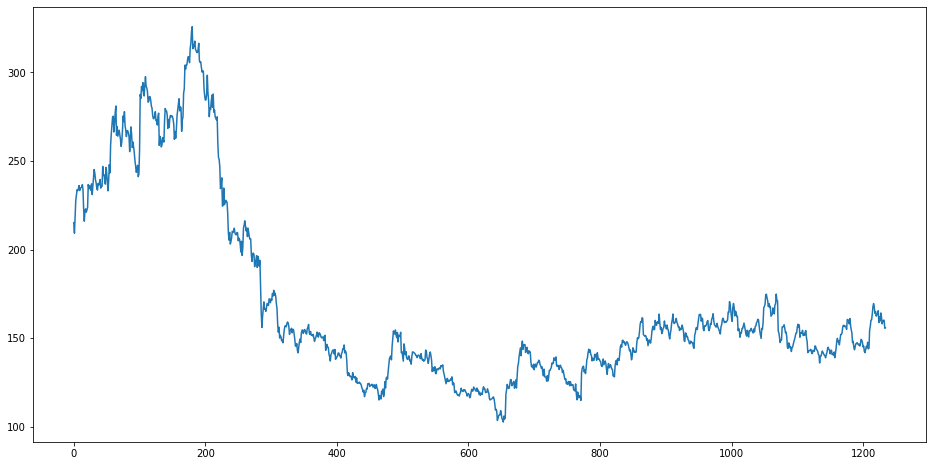

In [ ]:
#plot
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price history')

**Finding Root Mean Square Error**

In [ ]:
#creating dataframe with date and the target variable
Data = data.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 Shape of training set:
(987, 2)

 Shape of validation set:
(248, 2)

 RMSE value on validation set:
10.348782696345948


**Linear Regression**

Coefficients:
 [ 0.06591904  0.06740857 -0.04997244  0.91606679]
Intercept:
 0.08472042772430655
Variance:
 0.9999444971551508


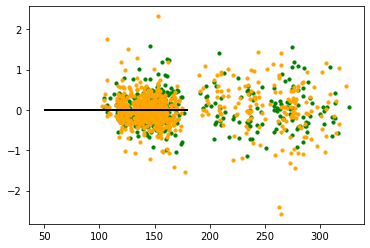

In [ ]:
#implement linear regression
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)
 
print("Coefficients:\n",linear_regression.coef_)
print("Intercept:\n",linear_regression.intercept_)

print("Variance:\n",linear_regression.score(x_test,y_test))
 
plt.scatter(linear_regression.predict(x_test),linear_regression.predict(x_test)-y_test, color="green", s=10, label="Test data")
 
plt.scatter(linear_regression.predict(x_train),linear_regression.predict(x_train)-y_train, color="orange", s=10, label="Train data")

plt.hlines(y=0, xmin=50,xmax=180,linewidth=2)

 **Polynomial Regression**

Coefficients:
 [ 0.00000000e+00  8.81829152e-02  1.03291603e-01 -5.12590873e-02
  8.61473234e-01 -6.92955080e-03 -4.38611741e-03  7.60454987e-03
  1.07204524e-02  1.19439614e-02  3.63029821e-04 -1.94249321e-02
 -3.70845107e-03 -6.33983168e-04  4.44882195e-03]
Variance:
 0.9999365423529375
R2:
 0.9999316836052088


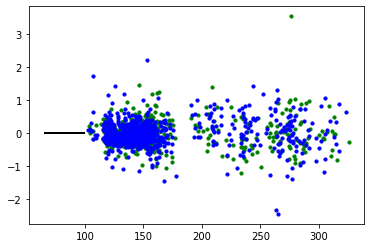

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
XP = poly_reg.fit_transform(X)

# Train and Test data split
x_train, x_test, y_train, y_test = train_test_split(XP,y,test_size=0.4,random_state=1)
 

# Define the multiple linear regression formula
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)
 
print("Coefficients:\n",linear_regression.coef_)
print("Variance:\n",linear_regression.score(x_test,y_test))
print("R2:\n",r2_score(y_train, linear_regression.predict(x_train)) )
 
plt.scatter(linear_regression.predict(x_test),linear_regression.predict(x_test)-y_test, color="green", s=10, label="Test data")
 
plt.scatter(linear_regression.predict(x_train),linear_regression.predict(x_train)-y_train, color="blue", s=10, label="Train data")
 
plt.hlines(y=0, xmin=65,xmax=100,linewidth=2)

**Ridge Regression**

CV Mean: 0.9999210215257346
STD: 1.1682475953699959e-05
Coefficients: [ 0.00000000e+00  8.81888065e-02  1.03296101e-01 -5.12622653e-02
  8.61465961e-01 -6.92951792e-03 -4.38615925e-03  7.60454994e-03
  1.07204003e-02  1.19439432e-02  3.63070853e-04 -1.94249151e-02
 -3.70847311e-03 -6.33965171e-04  4.44884726e-03]
Intercept: -0.12616164994440737
Variance:
 0.9999365423066038


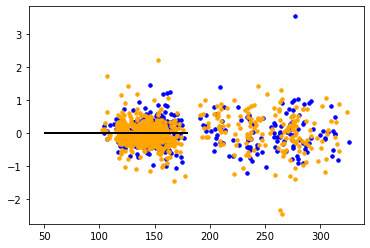

In [ ]:
# Ridge Regression Model 
from sklearn.model_selection import cross_val_score
def crossvalidation(model):
  scores = cross_val_score(model,x_train,y_train,cv=5,scoring='r2')
  print('CV Mean:', np.mean(scores))
  print('STD:', np.std(scores))

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.001)
ridge.fit(x_train,y_train)
r=crossvalidation(ridge)
print("Coefficients:",ridge.coef_)
print("Intercept:",ridge.intercept_)
print("Variance:\n",ridge.score(x_test,y_test))
 
plt.scatter(ridge.predict(x_test),ridge.predict(x_test)-y_test, color="blue", s=12, label="Test data")
 
plt.scatter(ridge.predict(x_train),ridge.predict(x_train)-y_train, color="orange", s=12, label="Train data")

plt.hlines(y=0, xmin=50,xmax=180,linewidth=2)

**Lasso Regression**

CV Mean: 0.9998297064747769
STD: 3.404356535391491e-05
Coefficients: [ 0.00000000e+00  5.95212808e-01  2.10485422e-01 -6.73848705e-02
  2.54012598e-01 -8.39194967e-04  2.08968671e-04 -1.08971116e-04
  3.36593545e-04 -2.54910541e-05 -1.08089936e-04  3.37740377e-04
 -4.43767076e-04  3.41510694e-04  3.30407855e-04]
Intercept: 0.0934996325765951
Variance:
 0.9998744379368562


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236.46504906958387, tolerance: 189.70695453913635
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.2461820007116, tolerance: 153.4466693581081
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182.57075236820248, tolerance: 143.5514090134907
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195.46265

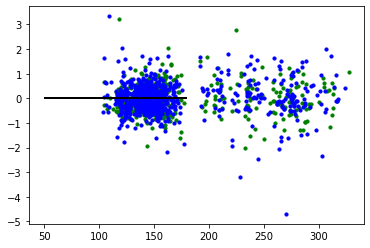

In [ ]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
crossvalidation(lasso)
print("Coefficients:",lasso.coef_)
print("Intercept:",lasso.intercept_)
print("Variance:\n",lasso.score(x_test,y_test))
 
plt.scatter(lasso.predict(x_test),lasso.predict(x_test)-y_test, color="green", s=10, label="Test data")
 
plt.scatter(lasso.predict(x_train),lasso.predict(x_train)-y_train, color="blue", s=10, label="Train data")

plt.hlines(y=0, xmin=50,xmax=180,linewidth=2)